# test_gps

In [ ]:
import time
from GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps,read_latitude,read_longitude,read_velocity

start = time.time()
init_gps_GPRMC()
end = time.time()
print("\n")
print("time seconds init_gps_GPRMC()", end-start)

print("\n")
start = time.time()
print(read_gps())
end = time.time()
print("time seconds read_gps() string", end-start)

print("\n")
start_all = time.time()
print("start_all")

print("\n")
start = time.time()
print(read_latitude())
end = time.time()
print("time seconds Latitude º", end-start)

print("\n")
start = time.time()
print(read_longitude())
end = time.time()
print("time seconds Longitude º", end-start)

print("\n")
start = time.time()
print(read_velocity())
end = time.time()
print("time seconds Velocity m/s", end-start)

print("time seconds all", end-start_all)# tolal time cost
print("google maps",read_latitude(),",",read_longitude())

# test_camera

time seconds image_Capture  0.5791475772857666


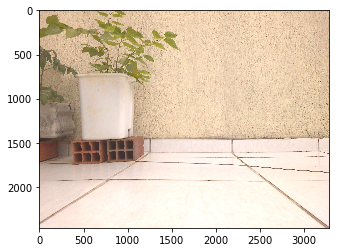

In [2]:
#!/usr/bin/env python3

import time
import cv2
from matplotlib import pyplot as plt

# gstreamer_pipeline returns a GStreamer pipeline for capturing from the CSI camera
# Defaults to 1280x720 @ 60fps
# Flip the image by setting the flip_method (most common values: 0 and 2)
# display_width and display_height determine the size of the window on the screen


def gstreamer_pipeline(capture_width=3280,capture_height=2464,
                       display_width=3280,display_height=2464,
                       framerate=21,flip_method=0,
                      ):
    
    return ("nvarguscamerasrc ! ""video/x-raw(memory:NVMM), "
            "width=(int)%d, height=(int)%d, "
            "format=(string)NV12, framerate=(fraction)%d/1 ! "
            "nvvidconv flip-method=%d ! "
            "video/x-raw, width=(int)%d, height=(int)%d,format=(string)BGRx ! "
            "videoconvert ! ""video/x-raw, format=(string)BGR ! appsink"
            % (capture_width,capture_height,framerate,flip_method,display_width,display_height,)
           )


def show_camera():
    start = time.time()
    #print(gstreamer_pipeline(flip_method=0))
    cap = cv2.VideoCapture(gstreamer_pipeline(flip_method=0), cv2.CAP_GSTREAMER)
    if cap.isOpened():
        ret_val, img = cap.read()
        end = time.time()
        print("time seconds image_Capture ", end-start)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        cap.release()
    else:
        print("Unable to open camera")


if __name__ == "__main__":
    show_camera()
